In [1]:
#importing dependencies

import openmc       #importing the openmc module
openmc.config['cross_sections']="/mnt/e/OpenMC_Projects/endfb-viii.0-hdf5/cross_sections.xml"

/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/config.py:65: UserWarning: '/mnt/e/OpenMC_Projects/endfb-vii.1-hdf5/cross_sections.xml' does not exist.
  warnings.warn(f"'{value}' does not exist.")


In [3]:
#defining materials

#We will define 3 different materials: 5% uranium oxide, Stainless steel, water 

en_u = openmc.Material(material_id = 1, name = '5% enriched uranium') 
en_u.add_element('U',1.0,enrichment=5.0)
en_u.add_element('O',2.0)
en_u.set_density('g/cc',10.96)
en_u.temperature = 900
en_u.depletable = True 

cladding = openmc.Material(material_id=2, name="stainless steel 316L")
cladding.add_element('Fe',0.66,'wo')
cladding.add_element('Cr', 0.17,'wo')
cladding.add_element('Ni', 0.12,'wo')
cladding.add_element('Mo',0.02,'wo')
cladding.add_element('Mn',0.02,'wo')
cladding.add_element('Si',0.01,'wo')
cladding.set_density('g/cm3',8.0)
cladding.temperature = 900
cladding.depletable = False

water = openmc.Material(material_id= 4, name='Water')
water.set_density('g/cm3', 0.76)
water.temperature = 600
water.add_element('H', 2)
water.add_element('O', 1)
water.add_s_alpha_beta('c_H_in_H2O')    #adding the thermal scattering table for water
water.depletable = False

Materials = openmc.Materials([en_u,cladding,water])
Materials.export_to_xml()               #creating the materials xml file

/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)
/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=2.
  warn(msg, IDWarning)
/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=4.
  warn(msg, IDWarning)


<Axes: xlabel='x [cm]', ylabel='y [cm]'>

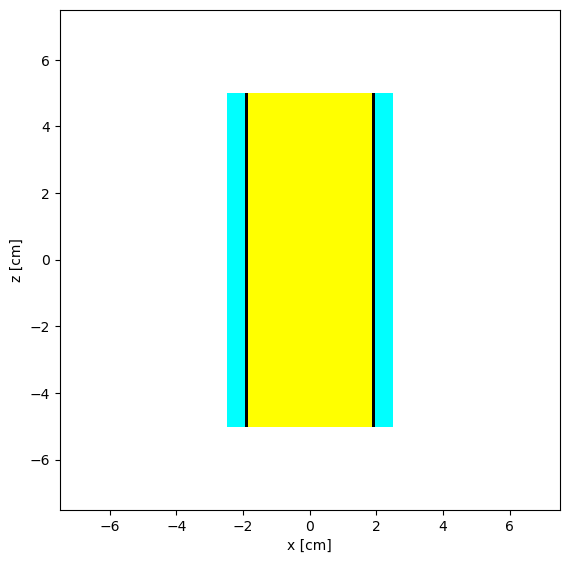

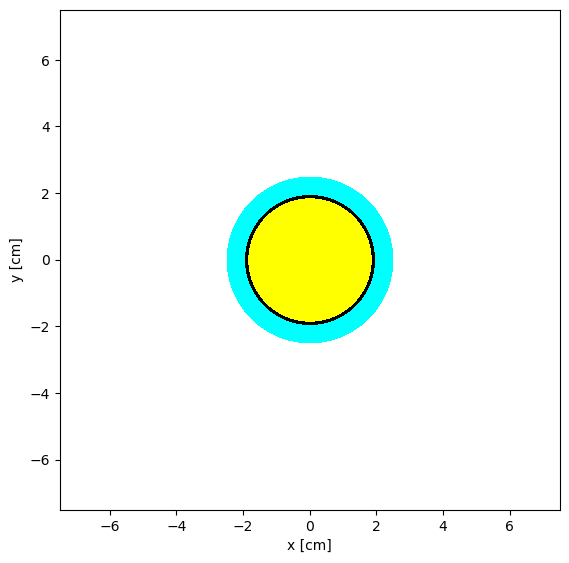

In [4]:
#defining The geometry

rod_radius = openmc.ZCylinder(surface_id = 10, r=1.85)                              #infinite concentric cylinder surfaces along Z-axis
clad_radius = openmc.ZCylinder(surface_id = 11,r=1.95)
water_radius = openmc.ZCylinder(surface_id = 14, r=2.5,boundary_type = 'reflective')
bottom = openmc.ZPlane(surface_id = 12,z0 =-5,boundary_type = 'reflective')         #Bottom surface limit
top = openmc.ZPlane(surface_id = 13,z0 =5,boundary_type = 'reflective')             #Top surface limit

#Defining Regions

fuel_region = -rod_radius & -top & +bottom                                          #inside inner cylinder
clad_region = -clad_radius & +rod_radius & -top & +bottom                           #outside inner cylinder and inside middle cylinder
coolant_region = +clad_radius & -water_radius & -top & +bottom                      #outside middle cylinder and inside outer cylinder

#Defining the cells

fuel_cell = openmc.Cell(cell_id=100, fill=en_u, region=fuel_region)                 
clad_cell = openmc.Cell(cell_id=101, fill=cladding, region=clad_region)
coolant_cell = openmc.Cell(cell_id=102, fill=water, region=coolant_region)


#Creating a Universe with the cells
fuel_rod = openmc.Universe(cells=[fuel_cell,clad_cell,coolant_cell]) 

#plotting the image of the fuel rod
fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (15,15), 
                 color_by = 'material', colors={en_u:'yellow',cladding:'black',water:'aqua'},basis='xz', openmc_exec='/home/hridoy/miniconda3/envs/openmc-env/bin/openmc')
fuel_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (15,15), 
                 color_by = 'material', colors={en_u:'yellow',cladding:'black',water:'aqua'}, basis='xy', openmc_exec='/home/hridoy/miniconda3/envs/openmc-env/bin/openmc')

In [5]:
#creating and exporting the geometry xml file

geometry = openmc.Geometry(fuel_rod)
geometry.export_to_xml()

In [6]:
#creating and exporting settings file

settings = openmc.Settings()
settings.batches = 100
settings.inactive = 20
settings.particles = 20000
settings.export_to_xml()

In [8]:
openmc.run(openmc_exec="/home/hridoy/miniconda3/envs/openmc-env/bin/openmc")

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################